## Lab Assignment: Data Cleaning and Preparation
Student:     Zachary Stallard

### Objective: To apply the techniques learned in class to clean and prepare data for analysis. Specifically, students will learn how to handle missing values, duplicates, and outliers in data. By the end of the lab assignment, students should be able to clean and prepare data for further analysis using Python.

### Instructions:
1. Download and import the "Adult Income" dataset from the UCI Machine Learning Repository.
2. Load the data into a DataFrame.
3. Explore the dataset and identify missing values, duplicates, and outliers.
4. Use appropriate techniques to handle missing values, duplicates, and outliers.
5. Perform basic data analysis on the cleaned dataset to answer the following questions.
6. Save the cleaned dataset to a CSV file for further analysis.

### Dataset
The "Adult Income" dataset contains information about individuals, including their age, education, work class, marital status, occupation, race, gender, native country, and income. The dataset contains 48,842 rows and 14 columns.

### Deliverable:
Modify this notebook to include the python code as well as any documentation related to your submission.  Submit the notebook as your response in Blackboard.

### Grading Criteria:

Your lab assignment will be graded based on the following criteria:

- Correctness of the implementation
- Proper use of basic control structures and functions
- Code efficiency
- Clarity and readability of the code
- Compliance with the instructions and deliverables.

### Student Submission
Download aind import the "Adult Income" dataset into a pandas dataframe

In [1]:
import pandas as pd

# Download dataset from UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None)

# Assign column names to the DataFrame
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
           'relationship', 'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = columns

# Display the first five rows of the DataFrame
print(df.head())


   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

1. Download and import the "Adult Income" dataset from the UCI Machine Learning Repository.

In [2]:
import pandas as pd

# Download dataset from UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None)

2. Load the data into a DataFrame.

In [3]:
# Assign column names to the DataFrame
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
           'relationship', 'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = columns

# Display the first five rows of the DataFrame
print(df.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race   gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

3. Explore the dataset and identify missing values, duplicates, and outliers.

In [4]:
import numpy as np

# How many rows and columns does the dataset have?
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# How many missing values are there in each column?
df.replace(' ?', np.nan, inplace=True)
print(f"Check for missing values: {df.isnull().sum()}")

# How many duplicates are there in the dataset?
print(f"Check for duplicates: {df.duplicated().sum()}")

# How many outliers are there in the dataset?
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column to find outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Set the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Number of outliers in '{col}': {len(outliers)}")

Number of rows: 32561
Number of columns: 15
Check for missing values: age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64
Check for duplicates: 24
Number of outliers in 'age': 143
Number of outliers in 'fnlwgt': 992
Number of outliers in 'education_num': 1198
Number of outliers in 'capital_gain': 2712
Number of outliers in 'capital_loss': 1519
Number of outliers in 'hours_per_week': 9008


4. Use appropriate techniques to handle missing values, duplicates, and outliers.

In [5]:
# Handle NaN values by filling with mode
for col in ['workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check missing values now
print(f"Check for missing values: {df.isnull().sum()}")

# Handle duplicates by dropping 
print(f"Number of rows before removing duplicates: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df.shape[0]}")

# Handling Outliers
print(f"Number of rows before removing age outliers: {df.shape[0]}")

# To handle outliers, we can remove any data points that fall outside of the 1.5 * IQR range:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
print(f"Number of rows after removing age outliers: {df.shape[0]}")

Check for missing values: age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
Number of rows before removing duplicates: 32561
Number of rows after removing duplicates: 32537
Number of rows before removing age outliers: 32537
Number of rows after removing age outliers: 32395


C:\Users\zpoke\AppData\Local\Temp\ipykernel_4556\1896205182.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


5. Perform basic data analysis on the cleaned dataset to answer the following questions.

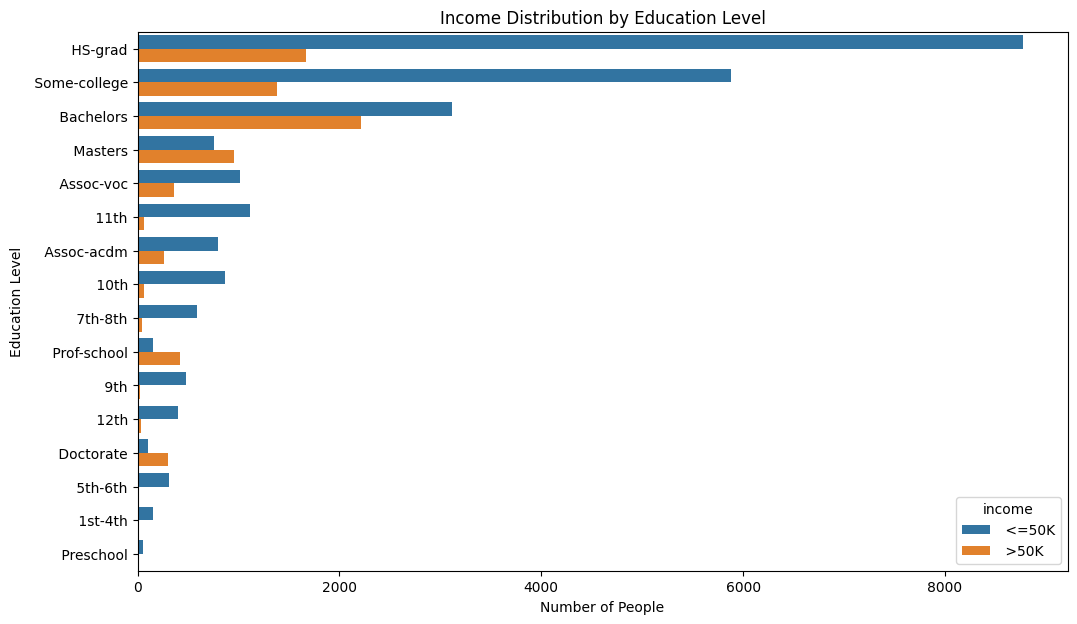

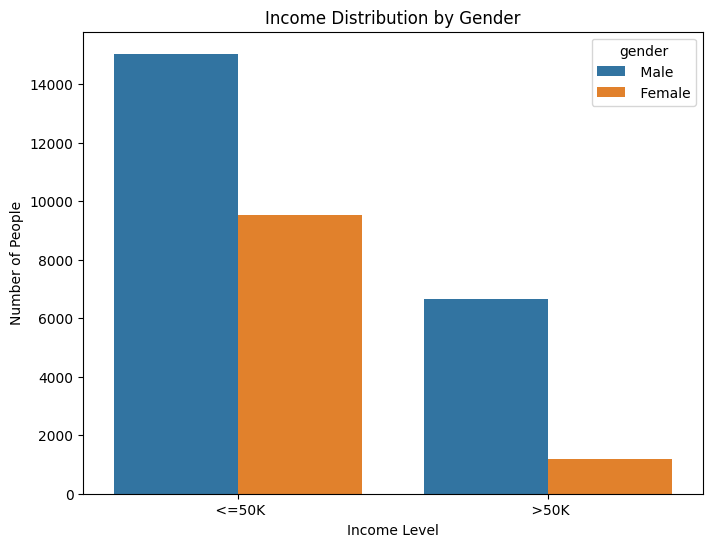

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1: How does education level affect income
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='education', hue='income',
              order=df['education'].value_counts().index)
plt.title('Income Distribution by Education Level')
plt.xlabel('Number of People')
plt.ylabel('Education Level')
plt.show()

# Question 2: How does gender relate to income
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='income', hue='gender')
plt.title('Income Distribution by Gender')
plt.xlabel('Income Level')
plt.ylabel('Number of People')
plt.show()

6. Save the cleaned dataset to a CSV file for further analysis.

In [7]:
output_filename = 'cleaned_adult_income.csv'
df.to_csv(output_filename, index=False)

print(f"\nCleaned dataset successfully save to '{output_filename}'")


Cleaned dataset successfully save to 'cleaned_adult_income.csv'
